# Import cac thu vien

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.formats.style_render import Index


In [2]:

#Path to file data
path = '/Users/thanhphuc/Documents/MachineLerning/House price prediction in Beijing/data/new.csv'

df = pd.read_csv(path, low_memory=False, encoding='GBK')

df.head()


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


# check data

In [3]:
df.constructionTime.value_counts()

2004    21145
2003    19409
未知      19283
2005    18924
2006    14854
        ...  
1934        2
1944        2
1906        1
1933        1
1914        1
Name: constructionTime, Length: 74, dtype: int64

In [4]:
df.livingRoom.value_counts()

2         160589
1          82386
3          67611
4           6821
5           1107
6            228
7             37
#NAME?        32
0             28
8              7
9              5
Name: livingRoom, dtype: int64

In [5]:
df.floor.value_counts()


中 6     34788
顶 6     22763
高 6     20904
低 6     15737
底 6     13338
        ...  
低 36        2
低 63        1
低 2         1
低 35        1
低 5         1
Name: floor, Length: 203, dtype: int64

In [6]:
bins = pd.cut(df['totalPrice'], bins=5)
count_per_group = bins.value_counts()
print(count_per_group)


(-18.03, 3626.08]       318830
(3626.08, 7252.06]          19
(10878.04, 14504.02]         1
(14504.02, 18130.0]          1
(7252.06, 10878.04]          0
Name: totalPrice, dtype: int64


# Lam sach du lieu

In [7]:
# Chuyen ki tu khong xac dinh bang so "0"
df['constructionTime'].replace({'未知': 0}, inplace=True)


In [8]:
# Xoa cac du lieu voi ten khong xac dinh
living_indexes = df.index[df['livingRoom']=='#NAME?'].tolist()
df = df.drop(index=living_indexes)


In [9]:
# Cat 2 ky tu cuoi va gan gia tri moi vao cot floor
floor_col = df.floor.apply(lambda x: str(x)[-2:])

df['floor'] = floor_col


In [10]:
# Xoa cac du lieu voi totalPrice lon hon 50000
totalPrice_indexes = df.index[df['totalPrice']>5000].tolist()
df = df.drop(index=totalPrice_indexes)


# Xay dung cac bieu do de truc quan hoa du lieu

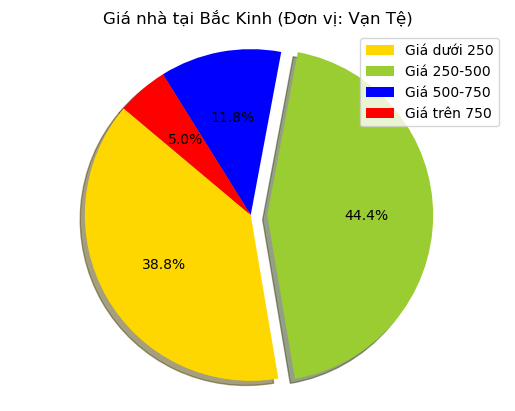

In [11]:


# Xác định các khoảng giá
price_bins = [0, 250, 500, 750, float('inf')]  # Khoảng giá từ 0 đến 250, từ 251 đến 500, từ 501 đến 750, trên 750

# Tạo cột mới "price_group" để lưu trữ nhóm giá
df['price_group'] = pd.cut(df['totalPrice'], bins=price_bins, labels=['<=250', '251-500', '501-750', '751+'])

# Đếm số lượng nhà ở mỗi nhóm giá
nha_250 = df[df['price_group'] == '<=250']['totalPrice'].count()
nha_500 = df[df['price_group'] == '251-500']['totalPrice'].count()
nha_1000 = df[df['price_group'] == '501-750']['totalPrice'].count()
nha_cao = df[df['price_group'] == '751+']['totalPrice'].count()


#

lst_gianha = [nha_250,nha_500,nha_1000,nha_cao]
lst_nha =['Giá dưới 250','Giá 250-500','Giá 500-750','Giá trên 750']
colors = ['gold', 'yellowgreen', 'blue', 'red']
explode = []
for i in lst_gianha:
    if i == max(lst_gianha):
        explode.append(0.1)
    else:
        explode.append(0)

plt.pie(lst_gianha,explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend(lst_nha)
plt.title("Giá nhà tại Bắc Kinh (Đơn vị: Vạn Tệ)")
plt.show()


In [12]:
# Xác định các khoảng giá cho số lượng phòng tắm
bathroom_bins = [0, 1, 2, 3, float('inf')]

# Tạo cột mới "bathroom_group" để lưu trữ nhóm phòng tắm
df['bathroom_group'] = pd.cut(df['bathRoom'].astype(int), bins=bathroom_bins, labels=['1', '2', '3', '4+'])

# Đếm số lượng phòng tắm trong từng nhóm
count_per_group = df['bathroom_group'].value_counts()



In [13]:
# Xác định các khoảng giá cho số lượng phòng tắm
kitchen_bins = [0, 1, 2, 3, float('inf')]

# Tạo cột mới "bathroom_group" để lưu trữ nhóm phòng tắm
df['kitchen_group'] = pd.cut(df['kitchen'], bins=kitchen_bins, labels=['1', '2', '3', '4+'])

# Đếm số lượng phòng tắm trong từng nhóm
count_per_groupa = df['kitchen_group'].value_counts()



In [14]:


# Xác định các khoảng giá cho số lượng phòng tắm
livingRoom_bins = [0, 1, 2, 3, float('inf')]

# Tạo cột mới "bathroom_group" để lưu trữ nhóm phòng tắm
df['livingRoom_group'] = pd.cut(df['livingRoom'].astype(int), bins=livingRoom_bins, labels=['1', '2', '3', '4+'])

# Đếm số lượng phòng tắm trong từng nhóm
count_per_groupaa = df['livingRoom_group'].value_counts()




Text(0.5, 1.0, ' Thống kê số lượng phòng của BĐS tại Bắc Kinh')

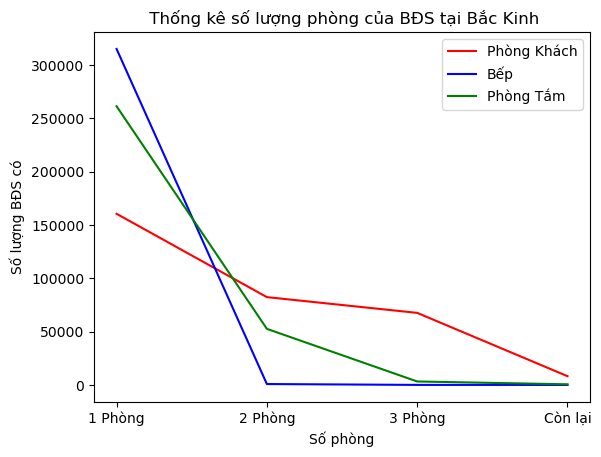

In [15]:
lst_label_phong = ['1 Phòng','2 Phòng','3 Phòng','Còn lại']

plt.plot(lst_label_phong,count_per_groupaa, label ="Phòng Khách", color ='r')
plt.plot(lst_label_phong,count_per_groupa , label = "Bếp", color = 'b')
plt.plot(lst_label_phong,count_per_group, label = "Phòng Tắm",color ='g')
plt.legend()
plt.xlabel('Số phòng')
plt.ylabel('Số lượng BĐS có')
plt.title(' Thống kê số lượng phòng của BĐS tại Bắc Kinh')

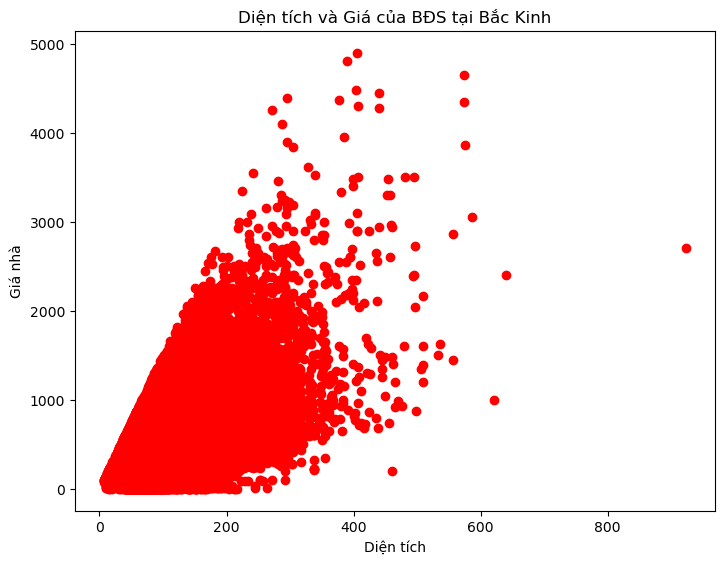

In [16]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
total_price = df.totalPrice
square = df.square
ax.scatter(square, total_price , color='r')
ax.set_xlabel('Diện tích')
ax.set_ylabel('Giá nhà')
ax.set_title('Diện tích và Giá của BĐS tại Bắc Kinh')
plt.show()


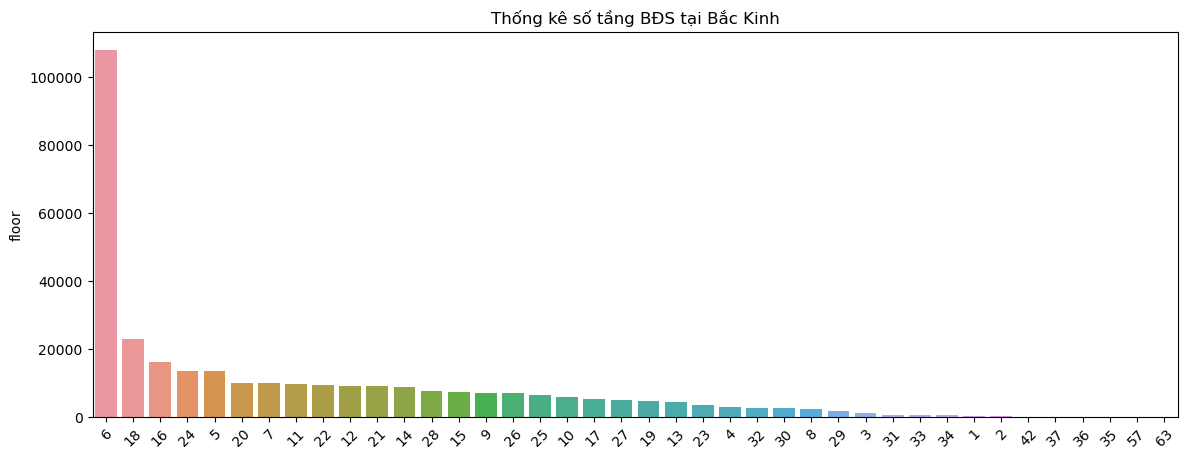

In [17]:
plt.figure(figsize=(14,5))
sns.barplot(x=floor_col.value_counts().index, y=floor_col.value_counts()).set_title('Thống kê số tầng BĐS tại Bắc Kinh')
plt.xticks(rotation=45)
plt.show()

# Train du lieu

# pip install --upgrade scikit-learn


In [18]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Thiet lap mo hinh train

In [19]:
#lấy những columns cần thiết để training

train = ['square','livingRoom','drawingRoom','kitchen','bathRoom','floor','constructionTime','district']
# livingRoom','drawingRoom','kitchen','bathRoom','floor','constructionTime

In [20]:
x = df[train]
y = df['totalPrice']
pd.isna(df[train]).any()


square              False
livingRoom          False
drawingRoom         False
kitchen             False
bathRoom            False
floor               False
constructionTime    False
district            False
dtype: bool

In [21]:
#Đưa dữ liệu vào train (80% train, 20% test)

x_train, x_valid,y_train, y_valid = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state = 27)

In [22]:
x_train

,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,district
171804,57.46,2,1,1,1,14,2000,7
4642,86.71,2,1,1,2,25,2009,7
18314,69.68,2,1,1,1,6,1999,7
73882,45.04,1,1,1,1,14,1994,7
220610,36.13,1,0,0,0,6,2004,2
...,...,...,...,...,...,...,...,...
267029,57.00,2,1,1,1,6,1989,8
196436,77.80,3,1,1,1,12,2003,1
14879,87.20,2,1,1,1,20,2008,6
36681,51.99,2,2,1,1,5,1977,7


In [23]:
x.shape 
#kiểm tra x_train đủ 70%

(318814, 8)

In [24]:
y_train

171804    195.0
4642      560.0
18314     490.0
73882     320.0
220610     24.6
          ...  
267029    400.0
196436    395.0
14879     380.0
36681     232.0
267320    365.0
Name: totalPrice, Length: 255051, dtype: float64

# Train voi mo hinh Decision Tree

In [25]:
dt_model = DecisionTreeRegressor(random_state=27)


In [26]:

dt_model.fit(x_train, y_train)


DecisionTreeRegressor(random_state=27)

In [27]:
y_predicts = dt_model.predict(x_valid)

In [28]:
sosanh = pd.DataFrame({'y': y_valid, 'y_predicts': y_predicts})
sosanh

,y,y_predicts
169973,136.0,134.000000
185541,363.0,189.750000
184564,325.0,218.000000
303669,213.8,288.000000
169494,221.0,241.000000
...,...,...
248861,250.0,286.666667
256651,450.0,430.000000
106635,237.0,175.000000
19791,648.0,680.000000


In [29]:
#Độ chính xác của dự đoán so với dữ liệu

from sklearn.metrics import r2_score
print('Độ chính xác của DecsionTreeRegressor:',r2_score(y_valid,y_predicts))



Độ chính xác của DecsionTreeRegressor: 0.4420555413605103


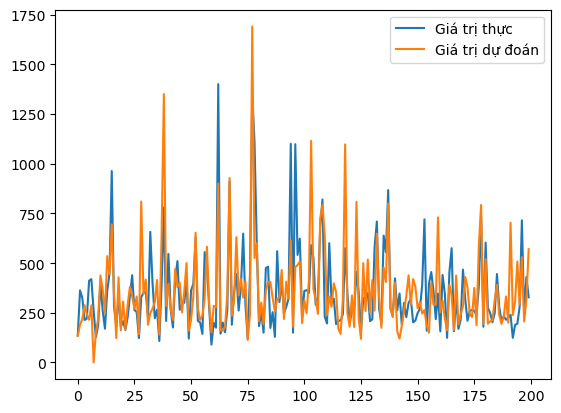

In [30]:
lst=[]
for i in range (200):
  lst.append(i)
#Trực quan hóa dữ liệu bằng mô hình Line
plt.plot(lst,y_valid.head(200), label='Giá trị thực')
plt.plot(lst,y_predicts[:200], label='Giá trị dự đoán')
plt.legend()
plt.show()

# Train voi mo hinh ramdomFoestR


# pip install --upgrade numpy scipy

In [31]:
from sklearn.ensemble import RandomForestRegressor




In [32]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [33]:


y_rf_predict = rf_model.predict(x_valid)



In [34]:
sosanh_rf = pd.DataFrame({'y': y_valid, 'y_predicts': y_rf_predict})
sosanh_rf

,y,y_predicts
169973,136.0,133.058214
185541,363.0,201.662917
184564,325.0,260.956952
303669,213.8,295.919000
169494,221.0,264.464095
...,...,...
248861,250.0,285.399401
256651,450.0,496.535000
106635,237.0,265.037667
19791,648.0,614.343690


In [35]:
print('Độ chính xác của RandomForestRegression:',r2_score(y_valid,y_rf_predict))

Độ chính xác của RandomForestRegression: 0.6087307742979273


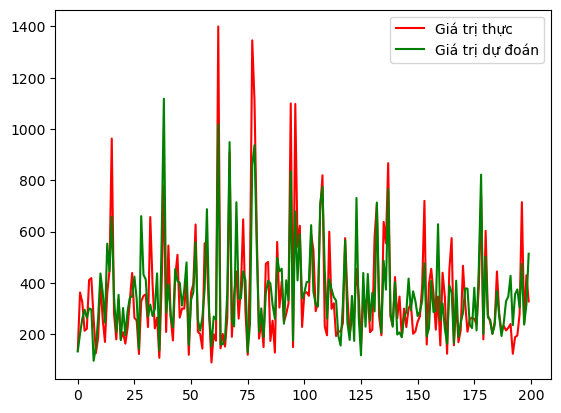

In [36]:
y_rf_predict.shape
lst=[]
for i in range (200):
  lst.append(i)
#Trực quan hóa dữ liệu bằng mô hình Line
plt.plot(lst,y_valid.head(200), label='Giá trị thực',color='r')
plt.plot(lst,y_rf_predict[:200], label='Giá trị dự đoán',color='g')
plt.legend()
plt.show()

# du doan gia nha tu du lieu them vao

In [37]:
#Dự đoán với input dữ liệu mới

# x_valid.head()
truong_input = ["square", "livingRoom", "drawingRoom", "kitchen", "bathRoom", "floor", "constructionTime", "district"]
y_tam = []

In [38]:
# voi mo hinh rf

        
for i in (truong_input):
    print("nhap gia tri", i, end=": ")
    val = input()
    y_tam.append(val)
    
y_tam = rf_model.predict([[50, 2, 1, 1, 1,3,2005, 3]])

nhap gia tri square: 50
nhap gia tri livingRoom: 4
nhap gia tri drawingRoom: 3
nhap gia tri kitchen: 2
nhap gia tri bathRoom: 1
nhap gia tri floor: 5
nhap gia tri constructionTime: 2003
nhap gia tri district: 4


/Users/thanhphuc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [39]:
print('Kết quả dự đoán giá nhà:', y_tam)



Kết quả dự đoán giá nhà: [206.35271429]


# Train voi Parameters

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# conda install tensorflow


# DTR

In [41]:
parameters = {
    'max_depth' : [4,5,6,7,None],
    'min_samples_split' : [2,5,8,10,15],
    'min_samples_leaf' : [1,2,3,4],
}

In [42]:
grid_dtree = GridSearchCV(estimator = dt_model, param_grid = parameters,scoring='neg_root_mean_squared_error',cv=4,n_jobs=-1)




In [43]:
grid_dtree.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=27), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 8, 10, 15]},
             scoring='neg_root_mean_squared_error')

RMSE :  111.58876543667233
R2 Score :  0.7568224688399394


/Users/thanhphuc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalPrice', ylabel='Density'>

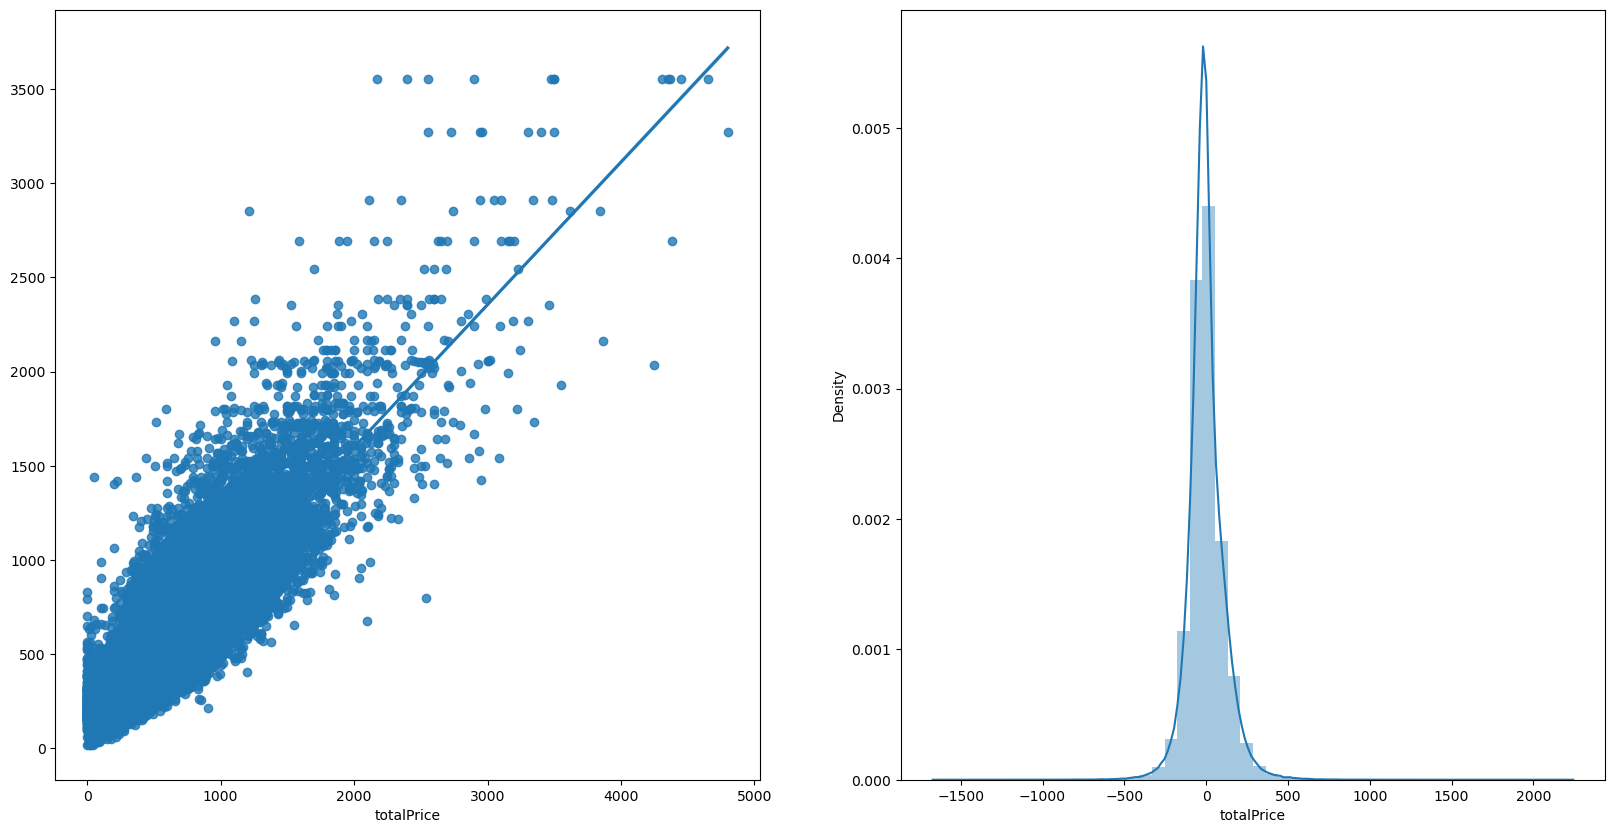

In [44]:
#ta train
predictions_train = grid_dtree.predict(x_train)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_train,predictions_train)))
print('R2 Score : ', r2_score(y_train,predictions_train))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y_train, y = predictions_train,ax = axes[0])
sns.distplot((y_train-predictions_train),ax = axes[1])


RMSE :  152.25931725099733
R2 Score :  0.5639663197232574


/Users/thanhphuc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalPrice', ylabel='Density'>

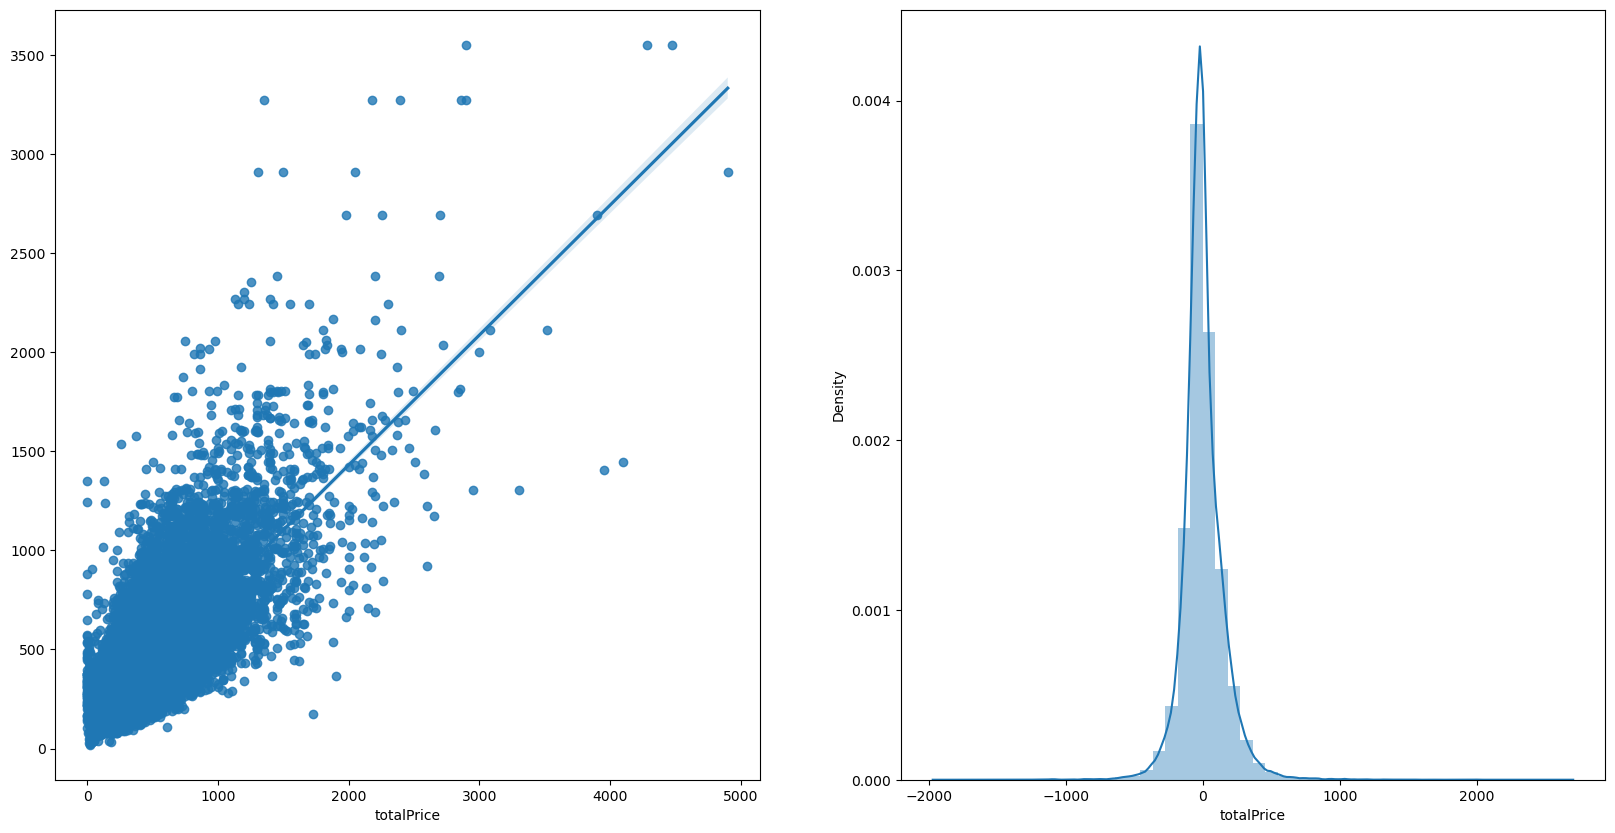

In [45]:
# tap test
predictions_test = grid_dtree.predict(x_valid)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_valid,predictions_test)))
print('R2 Score : ', r2_score(y_valid,predictions_test))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y_valid, y = predictions_test,ax = axes[0])
sns.distplot((y_valid-predictions_test),ax = axes[1])

In [46]:
print('Tap Train MAE:', metrics.mean_absolute_error(y_train,predictions_train))

print('Tap test MAE:', metrics.mean_absolute_error(y_valid,predictions_test))


Tap Train MAE: 77.52255870874757
Tap test MAE: 103.15230768067833


# RDF

In [47]:
parameters = {
    'max_depth' : [5,6,None],
    'min_samples_split' : [2,4],
    'min_samples_leaf' : [1,2],
    'n_estimators' : [100]
}

In [48]:
grid_rfc = GridSearchCV(estimator = rf_model,
                        param_grid = parameters,
                        scoring='neg_root_mean_squared_error',cv=4,n_jobs=-1
                       )

In [49]:
grid_rfc.fit(x_train,y_train)

/Users/thanhphuc/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 6, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4], 'n_estimators': [100]},
             scoring='neg_root_mean_squared_error')

RMSE :  91.45678384268659
R2 Score :  0.8366518014280577


/Users/thanhphuc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalPrice', ylabel='Density'>

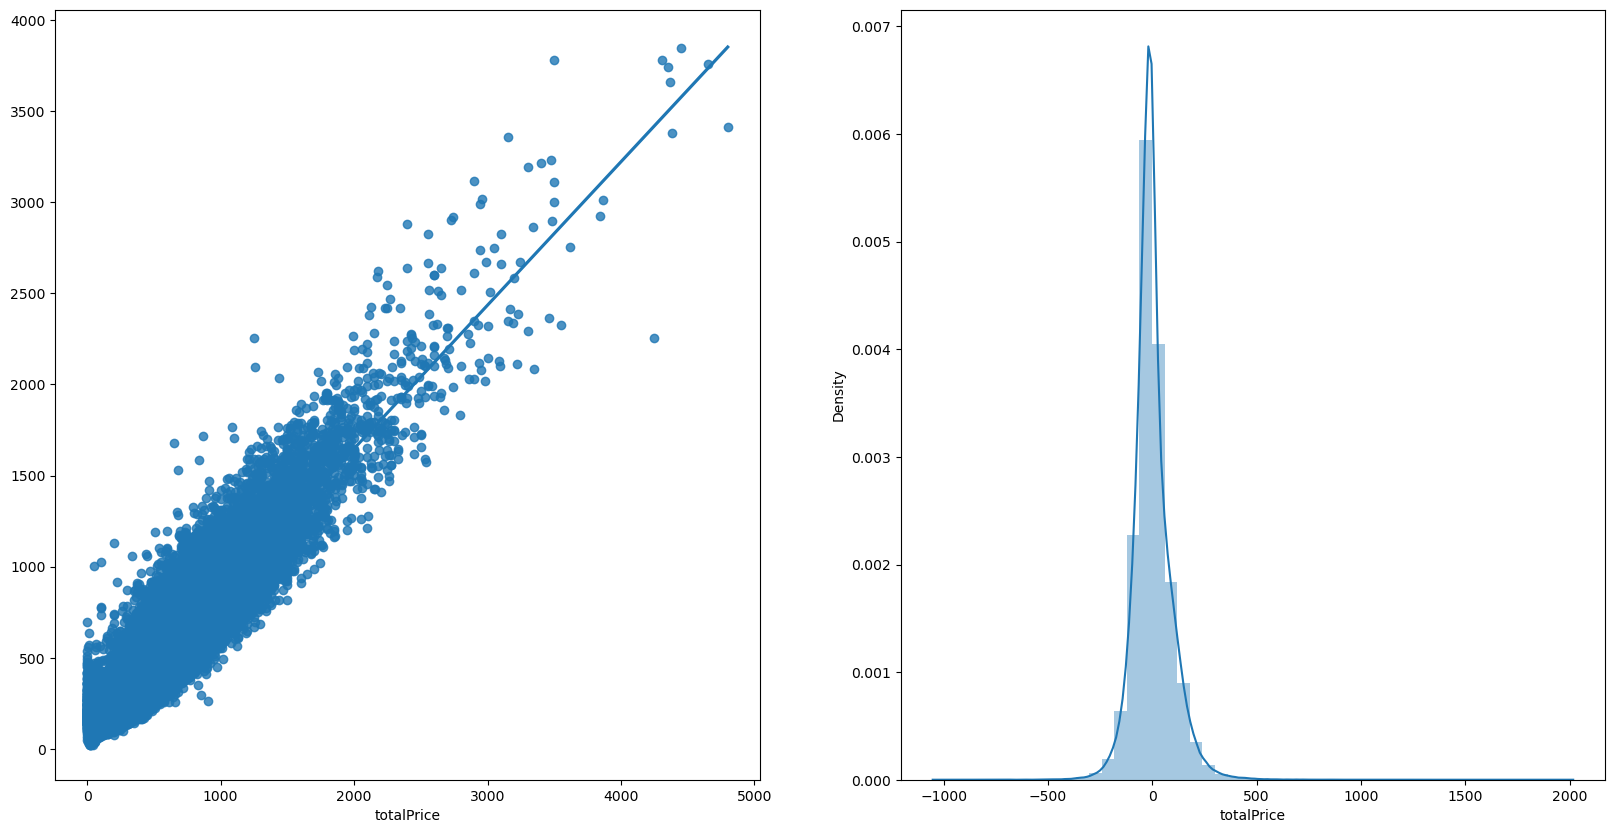

In [50]:
# Prediction with data train
predictions_train = grid_rfc.predict(x_train)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_train,predictions_train)))
print('R2 Score : ', r2_score(y_train,predictions_train))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y_train, y = predictions_train,ax = axes[0])
sns.distplot((y_train-predictions_train),ax = axes[1])

RMSE :  141.25299386509812
R2 Score :  0.6247267543173267


/Users/thanhphuc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalPrice', ylabel='Density'>

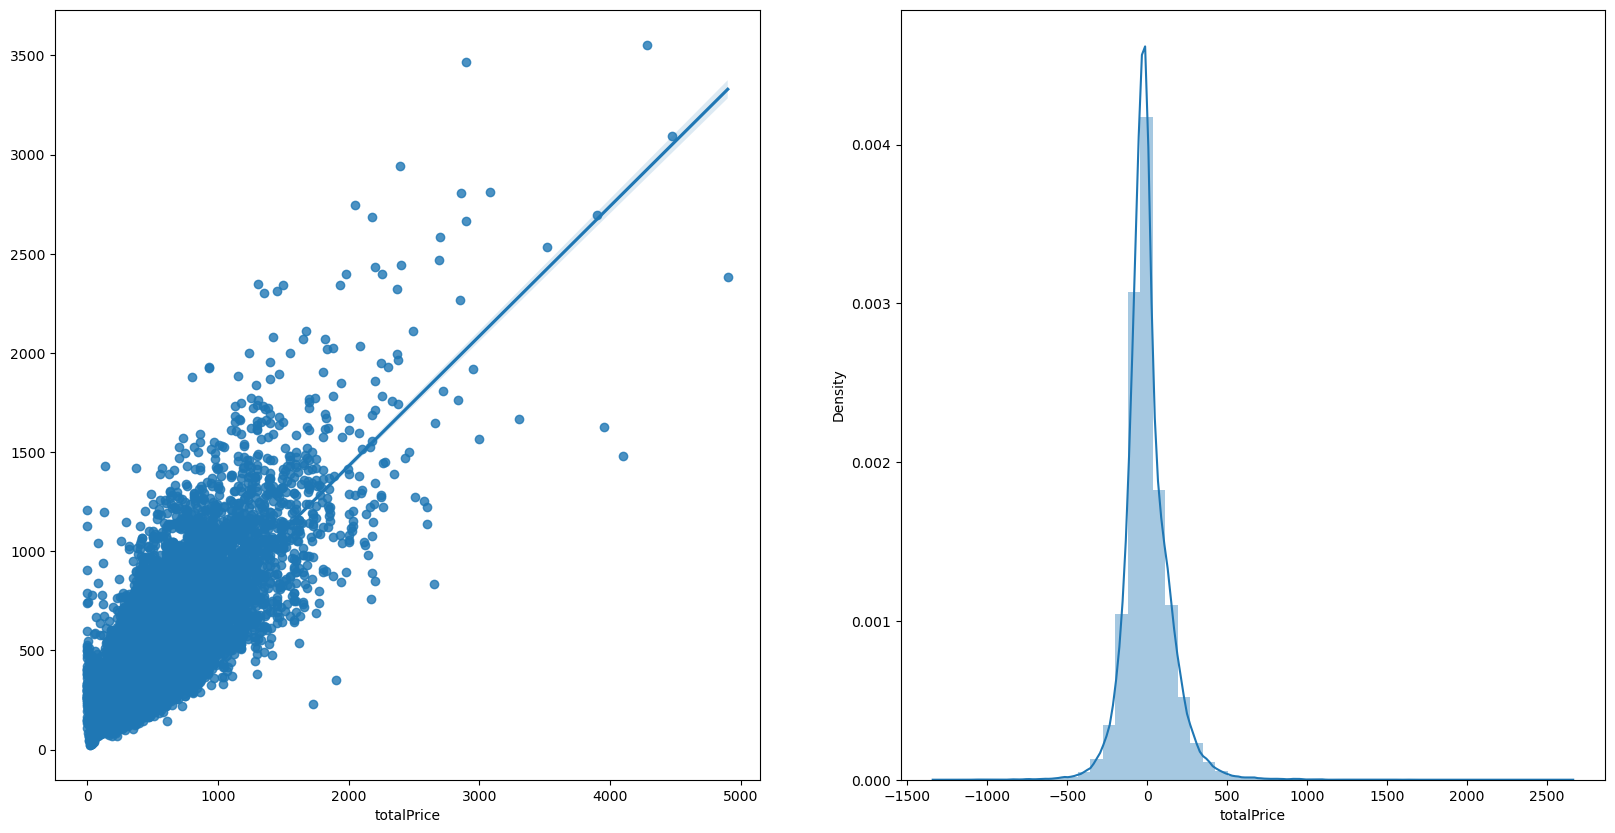

In [51]:
# tap test
predictions_test = grid_rfc.predict(x_valid)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_valid,predictions_test)))
print('R2 Score : ', r2_score(y_valid,predictions_test))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y_valid, y = predictions_test,ax = axes[0])
sns.distplot((y_valid-predictions_test),ax = axes[1])

In [52]:
print('Tap Train MAE:', metrics.mean_absolute_error(y_train,predictions_train))

print('Tap test MAE:', metrics.mean_absolute_error(y_valid,predictions_test))


Tap Train MAE: 64.76437689604592
Tap test MAE: 97.05802865104039
